In [1]:
import pandas as pd
import numpy as np
import mlflow.tensorflow

In [2]:
df = pd.read_csv('./breast-cancer.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [4]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,569.0,3.037183e+07,1.250206e+08,8670.000000,869218.000000,906024.000000,8.813129e+06,9.113205e+08
radius_mean,569.0,1.412729e+01,3.524049e+00,6.981000,11.700000,13.370000,1.578000e+01,2.811000e+01
texture_mean,569.0,1.928965e+01,4.301036e+00,9.710000,16.170000,18.840000,2.180000e+01,3.928000e+01
perimeter_mean,569.0,9.196903e+01,2.429898e+01,43.790000,75.170000,86.240000,1.041000e+02,1.885000e+02
area_mean,569.0,6.548891e+02,3.519141e+02,143.500000,420.300000,551.100000,7.827000e+02,2.501000e+03
smoothness_mean,569.0,9.636028e-02,1.406413e-02,0.052630,0.086370,0.095870,1.053000e-01,1.634000e-01
compactness_mean,569.0,1.043410e-01,5.281276e-02,0.019380,0.064920,0.092630,1.304000e-01,3.454000e-01
concavity_mean,569.0,8.879932e-02,7.971981e-02,0.000000,0.029560,0.061540,1.307000e-01,4.268000e-01
concave points_mean,569.0,4.891915e-02,3.880284e-02,0.000000,0.020310,0.033500,7.400000e-02,2.012000e-01
symmetry_mean,569.0,1.811619e-01,2.741428e-02,0.106000,0.161900,0.179200,1.957000e-01,3.040000e-01


## EDA

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='diagnosis', ylabel='count'>

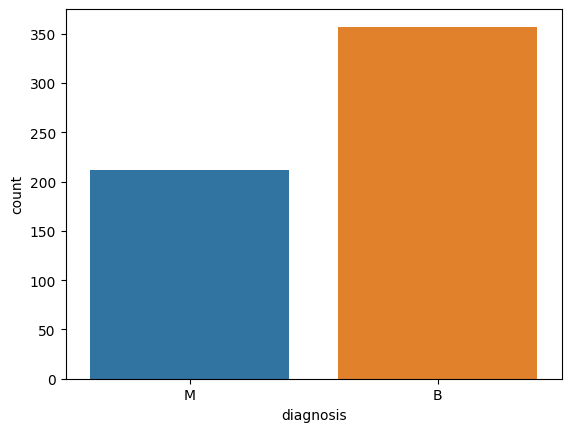

In [8]:
sns.countplot(x='diagnosis',data=df)

<Axes: >

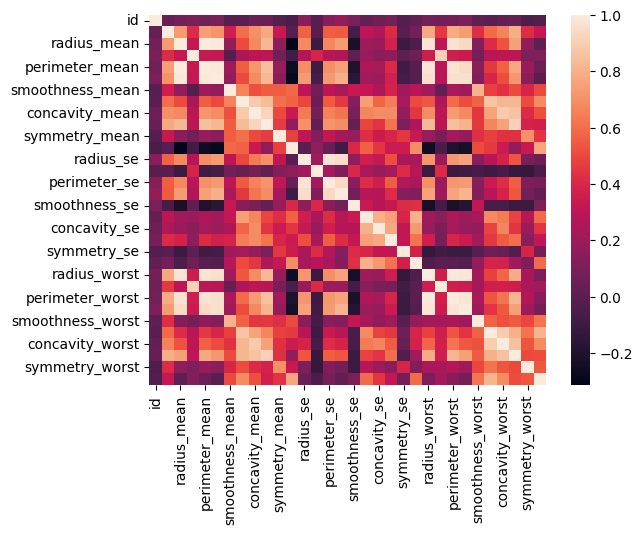

In [12]:
# Convert diagnosis columns to binary. 0 for benign and 1 for malignant
df['diagnosis'] = df['diagnosis'].apply(lambda x: 0 if x == 'B' else 1)

sns.heatmap(df.corr())

In [16]:
df.corr()['diagnosis'].sort_values()

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
id                         0.039769
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0

<Axes: >

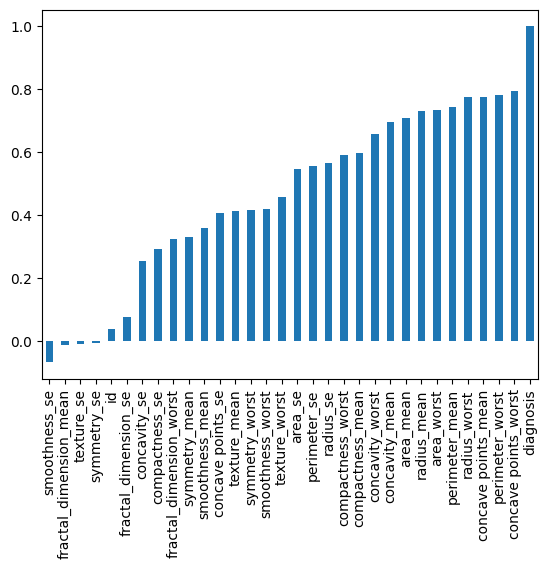

In [17]:
df.corr()['diagnosis'].sort_values().plot(kind='bar')

<Axes: >

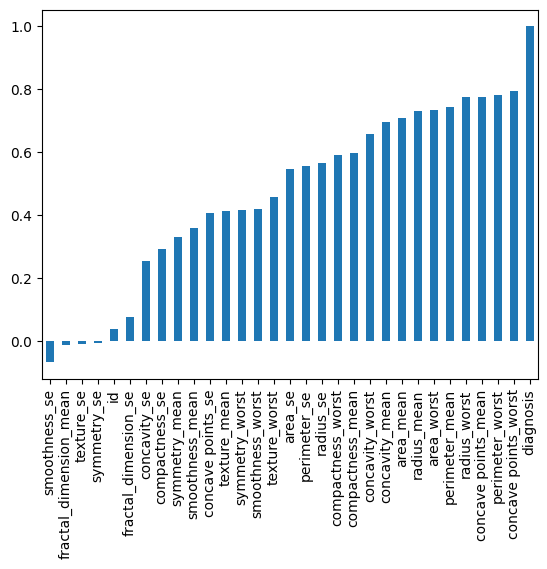

In [18]:
df.corr()['diagnosis'][:-1].sort_values().plot(kind='bar')

## Train Test Split

In [19]:
X = df.drop('diagnosis',axis=1).values
y = df['diagnosis'].values

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=101)


## Scaling Data

In [22]:
from sklearn.preprocessing import MinMaxScaler

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(X_train)

MinMaxScaler()

In [25]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

## Creating the Model

    # For a binary classification problem
    model.compile(optimizer='rmsprop',
                  loss='binary_crossentropy',
                  metrics=['accuracy'])
                  
    

In [26]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,Dropout

2024-11-08 21:01:42.499675: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-08 21:01:43.103039: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-08 21:01:44.988040: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [27]:
X_train.shape

(426, 31)

In [28]:
model = Sequential()

# https://stats.stackexchange.com/questions/181/how-to-choose-the-number-of-hidden-layers-and-nodes-in-a-feedforward-neural-netw

model.add(Dense(units=30,activation='relu'))

model.add(Dense(units=15,activation='relu'))


model.add(Dense(units=1,activation='sigmoid'))

# For a binary classification problem
model.compile(loss='binary_crossentropy', optimizer='adam')

2024-11-08 21:01:47.989355: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 21:01:48.331623: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 21:01:48.331826: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 21:01:48.345320: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-11-08 21:01:48.345659: I tensorflow/compile

In [29]:
mlflow.set_experiment("keras-breast-cancer")
mlflow.start_run(run_name="Run_1")

2024/11/08 21:01:59 INFO mlflow.tracking.fluent: Experiment with name 'keras-breast-cancer' does not exist. Creating a new experiment.


<ActiveRun: >

In [30]:
mlflow.tensorflow.autolog(every_n_iter=2)

## Training the Model 

### Example One: Choosing too many epochs and overfitting!

In [31]:
# https://stats.stackexchange.com/questions/164876/tradeoff-batch-size-vs-number-of-iterations-to-train-a-neural-network
# https://datascience.stackexchange.com/questions/18414/are-there-any-rules-for-choosing-the-size-of-a-mini-batch

model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1
          )

2024/11/08 21:02:03 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: 'Sequential' object has no attribute '_nested_inputs'
2024/11/08 21:02:06 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/mlflow/tensorflow/_autolog.py:48: UserWarning: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."


Epoch 1/600


2024-11-08 21:02:09.075023: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2024-11-08 21:02:09.534608: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fa3e038e880 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-11-08 21:02:09.534683: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA RTX A500 Laptop GPU, Compute Capability 8.6
2024-11-08 21:02:09.588270: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-11-08 21:02:09.982588: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8906
2024-11-08 21:02:10.209771: I ./tensorflow/compiler/jit/device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of th

14/14 [==============================] - 5s 22ms/step - loss: 0.6733 - val_loss: 0.6551
Epoch 2/600
14/14 [==============================] - 0s 12ms/step - loss: 0.6360 - val_loss: 0.6228
Epoch 3/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6038 - val_loss: 0.5900
Epoch 4/600
14/14 [==============================] - 0s 13ms/step - loss: 0.5691 - val_loss: 0.5527
Epoch 5/600
14/14 [==============================] - 0s 18ms/step - loss: 0.5292 - val_loss: 0.5079
Epoch 6/600
14/14 [==============================] - 0s 14ms/step - loss: 0.4803 - val_loss: 0.4546
Epoch 7/600
14/14 [==============================] - 0s 16ms/step - loss: 0.4299 - val_loss: 0.4043
Epoch 8/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3827 - val_loss: 0.3555
Epoch 9/600
14/14 [==============================] - 0s 18ms/step - loss: 0.3407 - val_loss: 0.3160
Epoch 10/600
14/14 [==============================] - 0s 13ms/step - loss: 0.3066 - val_loss: 0.2827
Epoch 11/60

2024/11/08 21:04:37 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/11/08 21:04:37 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a9365f0>, 140347360506896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a9365f0>, 140347360506896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a934070>, 140348627776944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a934070>, 140348627776944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935780>, 140347360840560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935780>, 140347360840560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935180>, 140347360841200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935180>, 140347360841200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2ceb0>, 140347360840800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2ceb0>, 140347360840800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2eb00>, 140347360839920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2eb00>, 140347360839920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a9365f0>, 140347360506896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a9365f0>, 140347360506896), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a934070>, 140348627776944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a934070>, 140348627776944), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935780>, 140347360840560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935780>, 140347360840560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935180>, 140347360841200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa52a935180>, 140347360841200), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2ceb0>, 140347360840800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2ceb0>, 140347360840800), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2eb00>, 140347360839920), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa523f2eb00>, 140347360839920), {}).


INFO:tensorflow:Assets written to: /tmp/tmpws0rt95c/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmpws0rt95c/model/data/model/assets
2024/11/08 21:04:46 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/_distutils_hack/__init__.py:26: UserWarning: Setuptools is replacing distutils."


In [32]:
mlflow.end_run()

In [33]:
# model.history.history

In [34]:
model_loss = pd.DataFrame(model.history.history)

In [35]:
# model_loss

<Axes: >

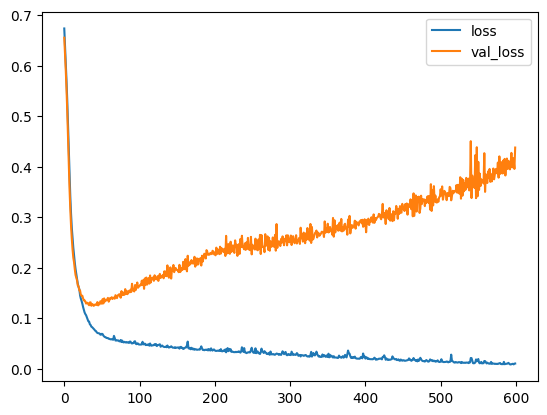

In [36]:
model_loss.plot()

## Example Two: Early Stopping

We obviously trained too much! Let's use early stopping to track the val_loss and stop training once it begins increasing too much!

In [37]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [38]:
from tensorflow.keras.callbacks import EarlyStopping

Stop training when a monitored quantity has stopped improving.

    Arguments:
        monitor: Quantity to be monitored.
        min_delta: Minimum change in the monitored quantity
            to qualify as an improvement, i.e. an absolute
            change of less than min_delta, will count as no
            improvement.
        patience: Number of epochs with no improvement
            after which training will be stopped.
        verbose: verbosity mode.
        mode: One of `{"auto", "min", "max"}`. In `min` mode,
            training will stop when the quantity
            monitored has stopped decreasing; in `max`
            mode it will stop when the quantity
            monitored has stopped increasing; in `auto`
            mode, the direction is automatically inferred
            from the name of the monitored quantity.

In [39]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [40]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

2024/11/08 21:04:49 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '0abb42e8b3d9431ea5e14d8696701188', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/11/08 21:04:49 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: 'Sequential' object has no attribute '_nested_inputs'
2024/11/08 21:04:50 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/mlflow/tensorflow/_autolog.py:48: UserWarning: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."


Epoch 1/600
14/14 [==============================] - 3s 49ms/step - loss: 0.6940 - val_loss: 0.6833
Epoch 2/600
14/14 [==============================] - 0s 22ms/step - loss: 0.6628 - val_loss: 0.6518
Epoch 3/600
14/14 [==============================] - 0s 25ms/step - loss: 0.6345 - val_loss: 0.6242
Epoch 4/600
14/14 [==============================] - 0s 24ms/step - loss: 0.6040 - val_loss: 0.5894
Epoch 5/600
14/14 [==============================] - 0s 34ms/step - loss: 0.5666 - val_loss: 0.5493
Epoch 6/600
14/14 [==============================] - 0s 29ms/step - loss: 0.5238 - val_loss: 0.5012
Epoch 7/600
14/14 [==============================] - 0s 31ms/step - loss: 0.4768 - val_loss: 0.4559
Epoch 8/600
14/14 [==============================] - 0s 24ms/step - loss: 0.4334 - val_loss: 0.4090
Epoch 9/600
14/14 [==============================] - 0s 23ms/step - loss: 0.3903 - val_loss: 0.3660
Epoch 10/600
14/14 [==============================] - 0s 25ms/step - loss: 0.3529 - val_loss: 0.3295

2024/11/08 21:05:16 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/11/08 21:05:16 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a4f70>, 140346117800384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a4f70>, 140346117800384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6440>, 140346117804384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6440>, 140346117804384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6ec0>, 140346118133264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6ec0>, 140346118133264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a7e20>, 140346117802064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a7e20>, 140346117802064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06dcd60>, 140346118134064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06dcd60>, 140346118134064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06ddc90>, 140346118134704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06ddc90>, 140346118134704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a4f70>, 140346117800384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a4f70>, 140346117800384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6440>, 140346117804384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6440>, 140346117804384), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6ec0>, 140346118133264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a6ec0>, 140346118133264), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a7e20>, 140346117802064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e08a7e20>, 140346117802064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06dcd60>, 140346118134064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06dcd60>, 140346118134064), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06ddc90>, 140346118134704), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e06ddc90>, 140346118134704), {}).


INFO:tensorflow:Assets written to: /tmp/tmp7c2o4ast/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp7c2o4ast/model/data/model/assets


<Axes: >

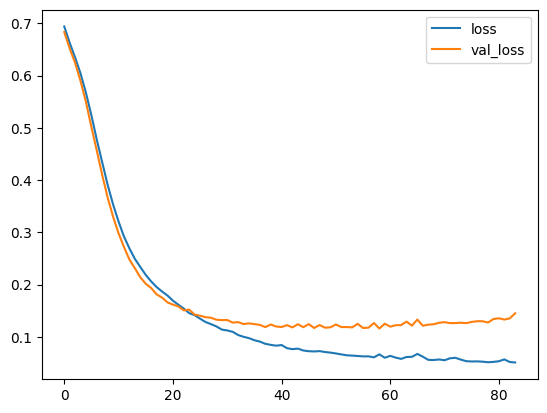

In [41]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

## Example Three: Adding in DropOut Layers

In [42]:
from tensorflow.keras.layers import Dropout

In [43]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [44]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

2024/11/08 21:05:22 INFO mlflow.utils.autologging_utils: Created MLflow autologging run with ID '4e6e769fcda44919bfa08026900c5910', which will track hyperparameters, performance metrics, model artifacts, and lineage information for the current tensorflow workflow
2024/11/08 21:05:22 WARNING mlflow.tensorflow: Encountered unexpected error while inferring batch size from training dataset: 'Sequential' object has no attribute '_nested_inputs'
2024/11/08 21:05:23 WARNING mlflow.utils.autologging_utils: MLflow autologging encountered a warning: "/opt/conda/lib/python3.10/site-packages/mlflow/tensorflow/_autolog.py:48: UserWarning: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data."


Epoch 1/600
14/14 [==============================] - 1s 21ms/step - loss: 0.7209 - val_loss: 0.6850
Epoch 2/600
14/14 [==============================] - 0s 10ms/step - loss: 0.6983 - val_loss: 0.6713
Epoch 3/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6764 - val_loss: 0.6584
Epoch 4/600
14/14 [==============================] - 0s 11ms/step - loss: 0.6543 - val_loss: 0.6434
Epoch 5/600
14/14 [==============================] - 0s 16ms/step - loss: 0.6446 - val_loss: 0.6289
Epoch 6/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6328 - val_loss: 0.6132
Epoch 7/600
14/14 [==============================] - 0s 8ms/step - loss: 0.6236 - val_loss: 0.5926
Epoch 8/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6057 - val_loss: 0.5737
Epoch 9/600
14/14 [==============================] - 0s 8ms/step - loss: 0.5849 - val_loss: 0.5528
Epoch 10/600
14/14 [==============================] - 0s 9ms/step - loss: 0.5864 - val_loss: 0.5322
Epoc

2024/11/08 21:05:56 WARNING mlflow.tensorflow: Failed to infer model signature: could not sample data to infer model signature: tuple index out of range
2024/11/08 21:05:56 WARNING mlflow.tensorflow: You are saving a TensorFlow Core model or Keras model without a signature. Inference with mlflow.pyfunc.spark_udf() will not work unless the model's pyfunc representation accepts pandas DataFrames as inference inputs.


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e0530190>, 140346115311376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e0530190>, 140346115311376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05325c0>, 140346115312016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05325c0>, 140346115312016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05300d0>, 140346119298848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05300d0>, 140346119298848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05326b0>, 140346115494560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05326b0>, 140346115494560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059bd90>, 140346115137632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059bd90>, 140346115137632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059ad40>, 140346115138272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059ad40>, 140346115138272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e0530190>, 140346115311376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(31, 30), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e0530190>, 140346115311376), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05325c0>, 140346115312016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05325c0>, 140346115312016), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05300d0>, 140346119298848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(30, 15), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05300d0>, 140346119298848), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05326b0>, 140346115494560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e05326b0>, 140346115494560), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059bd90>, 140346115137632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(15, 1), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059bd90>, 140346115137632), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059ad40>, 140346115138272), {}).


INFO:tensorflow:Unsupported signature for serialization: ((TensorSpec(shape=(1,), dtype=tf.float32, name='gradient'), <tensorflow.python.framework.func_graph.UnknownArgument object at 0x7fa4e059ad40>, 140346115138272), {}).


INFO:tensorflow:Assets written to: /tmp/tmp4m49e2hk/model/data/model/assets


INFO:tensorflow:Assets written to: /tmp/tmp4m49e2hk/model/data/model/assets


<Axes: >

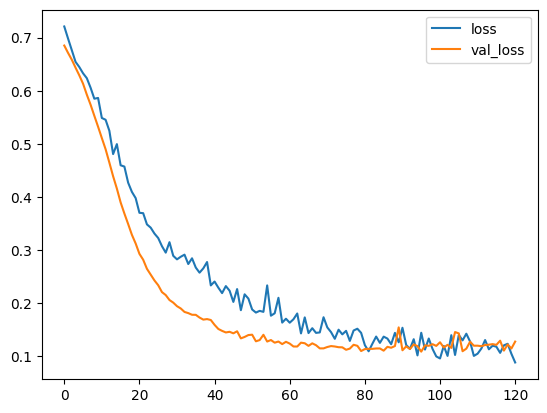

In [45]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

# Model Evaluation

In [46]:
predictions = model.predict(X_test)
predictions_binary = [1 if p > 0.5 else 0 for p in predictions]

5/5 [==============================] - 0s 3ms/step


In [47]:
from sklearn.metrics import classification_report,confusion_matrix

In [48]:
# https://en.wikipedia.org/wiki/Precision_and_recall
print(classification_report(y_test, predictions_binary))

              precision    recall  f1-score   support

           0       0.99      0.94      0.97        88
           1       0.92      0.98      0.95        55

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [49]:
print(confusion_matrix(y_test,predictions_binary))

[[83  5]
 [ 1 54]]
